## Calibration of probe 38
 
 Probe on the profiler

File variables:

|variable name| type and shape|
|::|::|
|'ch1':| float, array(nsamples)|
|'ch2': |float, array(nsamples)|
|'ch3': |float, array(nsamples)|
|'ch4': |float, array(nsamples)|
|'dt': |float, scalar|
|'macORpc': |str ('mac')|
|'nSample': |float, scalar|
|'nSamples': |float, scalar|
|'portNumber':| int, scalar|
|'pp':| float, array, not sure what it has|
|'time':| float, array(nsamples)|
|'timeElapsed':| float,scalar|

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
    df = pd.read_csv('../Probe38Calibration01/probe_38_calibration_01.csv',header=0)
print(df)


    salty  fresh  percentage  density
0     NaN    NaN         100  1.03138
1     NaN    NaN          90  1.02848
2     NaN    NaN          80  1.02516
3     NaN    NaN          70  1.02167
4     NaN    NaN          60  1.01833
5     NaN    NaN          50  1.01483
6     NaN    NaN          40  1.01175
7     NaN    NaN          30  1.00844
8     NaN    NaN          20  1.00495
9     NaN    NaN          10  1.00203
10    NaN    NaN           0  0.99796


../Probe38Calibration01/100_p38.mat
../Probe38Calibration01/090_p38.mat
../Probe38Calibration01/080_p38.mat
../Probe38Calibration01/070_p38.mat
../Probe38Calibration01/060_p38.mat
../Probe38Calibration01/050_p38.mat
../Probe38Calibration01/040_p38.mat
../Probe38Calibration01/030_p38.mat
../Probe38Calibration01/020_p38.mat
../Probe38Calibration01/010_p38.mat
../Probe38Calibration01/000_p38.mat


Text(0.5,1,'CH1 - probe 38')

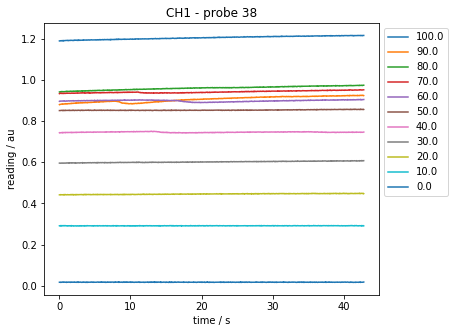

In [16]:
file_num = 11

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

fig, ax0 = plt.subplots(1,1, figsize=(6,5), sharey=True)

nums = ['000','010', '020','030','040', '050','060','070','080','090', '100']

for numfile, ii in zip(nums[::-1],range(file_num)):
    filepath = '../Probe38Calibration01/%s_p38.mat' %numfile
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
     
    ax0.plot(time,ch1, label='%1.1f' %df.percentage[ii])
    
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax0.set_title('CH1 - probe 38')


Text(0.5,1,'Probe 38')

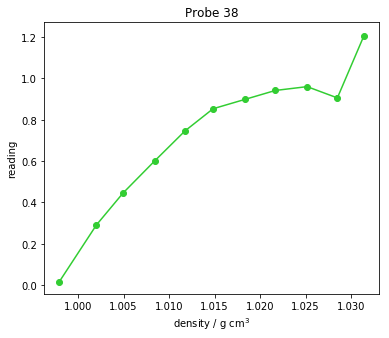

In [17]:
fig, (ax0) = plt.subplots(1,1, figsize=(6,5), sharey=True)

ax0.errorbar(df.density,mean_read_ch1, yerr=std_read_ch1, marker='o', color='limegreen')

ax0.set_ylabel('reading')
ax0.set_xlabel('density / g cm$^3$')
ax0.set_title('Probe 38')



Probe 38
rho_38 = 0.998598+-0.006193r+0.050676r^2+-0.018454r^3 



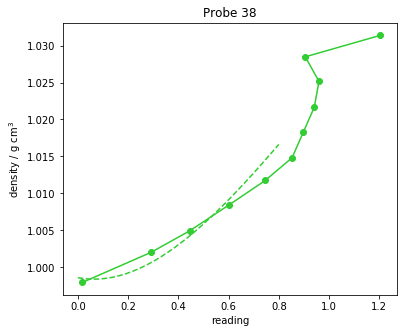

In [27]:
coef38, stats38 = P.polyfit(mean_read_ch1[:],df.density[:],3,full=True)

read_dummy = np.linspace(0,0.8,30)
fit38 = coef38[0]+(coef38[1]*read_dummy)+(coef38[2]*read_dummy**2) + (coef38[3]*read_dummy**3)

fig, ax0 = plt.subplots(1,1, figsize=(6,5), sharey=True)

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fit38, '--',color='limegreen')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax0.set_title('Probe 38')

print('Probe 38')
print('rho_38 = %f+%fr+%fr^2+%fr^3 \n' %(coef38[0], coef38[1], coef38[2], coef38[3]))


To get density from the conduino probes:

Probe 38 

$\rho_38 = 0.997645+0.004937r+0.006870r^2+-0.000332r^3$

